# 1. Imports

## Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import math
import sqlite3 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from math import ceil 
from collections import Counter
from scipy.cluster.hierarchy import dendrogram

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.base import clone
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from pandas_profiling import ProfileReport

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

## Import dataset

In [3]:
df = pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')

__Copy of the original dataset:__

In [4]:
df_original = df.copy()

-------------------------------

# 2. Data Exploration

## Data Overview

In [5]:
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [6]:
df.shape

(14942, 31)

In [7]:
df.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

In [8]:
# check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14942.0,17470.500000,4313.528196,10000.00,13735.25,17470.50,21205.750,24941.00
Age,14942.0,26.015794,14.156582,0.00,19.00,23.00,31.000,87.00
Income,14447.0,2230.816086,1566.527734,0.00,1470.00,1990.00,2790.000,10890.00
DaysWithoutFrequency,14942.0,81.224936,144.199576,0.00,13.00,41.00,83.750,1745.00
LifetimeValue,14942.0,302.561871,364.319566,0.00,83.60,166.20,355.075,6727.80
UseByTime,14942.0,0.047116,0.211893,0.00,0.00,0.00,0.000,1.00
AthleticsActivities,14906.0,0.007380,0.085590,0.00,0.00,0.00,0.000,1.00
WaterActivities,14905.0,0.296209,0.456600,0.00,0.00,0.00,1.000,1.00
FitnessActivities,14907.0,0.576038,0.494201,0.00,0.00,1.00,1.000,1.00
DanceActivities,14906.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


In [9]:
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

# 3. Data Preprocessing

In [10]:
# fix wrong dtypes

df['Gender'] = LabelEncoder().fit_transform(df['Gender']) # 0 Female | 1 Male

bool = ['Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
        'DanceActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities',
        'NatureActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout']  
for i in bool:
    df[i]=df[i].astype("boolean") # converting to "boolean" over "bool" allows preservation of NaNs

date_columns = ['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit']
for i in date_columns:
    df[i] = pd.to_datetime(df[i], format='%Y-%m-%d')

df.dtypes

ID                                     int64
Age                                    int64
Gender                               boolean
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                            boolean
AthleticsActivities                  boolean
WaterActivities                      boolean
FitnessActivities                    boolean
DanceActivities                      boolean
TeamActivities                       boolean
RacketActivities                     boolean
CombatActivities                     boolean
NatureActivities                     boolean
SpecialActivities                    boolean
OtherActivities                      boolean
NumberOfFr

In [11]:
# Duplicated observations
df.duplicated().sum()

0

In [12]:
# Remove column 'ID' because it's an identifier and doesn't contribute to the clustering process
df.drop('ID', axis=1, inplace=True)
df[df.duplicated(keep=False)]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
8942,12,False,0.0,2019-06-18,2019-09-10,2019-07-01,2019-12-31,2019-07-31,41,73.35,...,False,14.0,7,5.0,44.3,10,1,False,0,True
12873,12,False,0.0,2019-06-18,2019-09-10,2019-07-01,2019-12-31,2019-07-31,41,73.35,...,False,14.0,7,5.0,44.3,10,1,False,0,True


In [13]:
# Remove columns 'DanceActivities' and 'NatureActivities' because both have only 1 value
df = df.drop(columns=['DanceActivities','NatureActivities'])

#### Enrollment

In [14]:
# Não há nenhuma incoerência em que EnrollmentStart seja depois de EnrollmentFinish
df[df['EnrollmentStart'] > df['EnrollmentFinish']]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [15]:
# Não há nenhuma incoerência em que DateLastVisit seja depois de EnrollmentFinish, quando dropout=1
df[(df['Dropout'] == 1) & (df['DateLastVisit'] > df['EnrollmentFinish'])]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [13]:
# Não há nenhuma observação em que EnrollmentStart e EnrollmentFinish sejam iguais e Dropout=1.
# Isso só acontece quando o cliente ainda está inscrito (Dropout=0)
df[(df['EnrollmentStart'] == df['EnrollmentFinish']) & df['Dropout'] == 1]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [14]:
# Se dropout=0 (o cliente ainda está inscrito), então EnrollmentFinish deve ser a data de até quando foram recolhidos os dados: 2019-10-31.
df.loc[df['Dropout'] == 0, 'EnrollmentFinish'] = pd.to_datetime('2019-10-31')

In [15]:
# Calculate the difference in days between EnrollmentStart and EnrollmentFinish.
df['DaysEnrolled'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

In [ ]:
df['Regularity'] = df['NumberOfFrequences'] / df['DaysEnrolled']

#### Activities

In [16]:
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Create a new column 'TotalActivities' by summing the binary columns
df['NumberOfActivities'] = df[activity_columns].sum(axis=1)

df['NumberOfActivities'].value_counts(normalize=True)

NumberOfActivities
1    0.910655
2    0.079441
3    0.006559
0     0.00261
4    0.000602
5    0.000134
Name: proportion, dtype: Float64

In [17]:
pd.DataFrame(df[activity_columns].sum(axis=0), columns=['ActivityCount']).sort_values('ActivityCount', ascending=False)

,ActivityCount
FitnessActivities,8587
WaterActivities,4415
CombatActivities,1609
TeamActivities,828
SpecialActivities,395
RacketActivities,349
AthleticsActivities,110
OtherActivities,28


#### HasReferences

In [18]:
# Em certas observações, 'HasReferences' tem valor 1 quando 'NumberOfReferences’ é 0
df[['HasReferences']].mode().loc[0]

HasReferences    False
Name: 0, dtype: boolean

In [19]:
# Como a moda de 'HasReferences' é 0, então nas observações em que 'HasReferences'==1
# e 'NumberOfReferences'==0, faz sentido mudar a variável 'HasReferences' para 0, em vez de
# mudarmos 'NumberOfReferences' para outro valor

df.loc[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0), 'HasReferences'] = False

### Relevancy

In [ ]:
df_copy = df.copy

In [21]:
df_copy.drop(['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart',
         'LastPeriodFinish', 'DateLastVisit'], axis=1, inplace=True)

In [20]:
df_copy.drop('HasReferences', axis=1, inplace=True)

In [35]:
df_copy.drop(['UseByTime','AllowedNumberOfVisitsBySLA','RealNumberOfVisits'], axis=1, inplace=True)

In [30]:
df_copy['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [31]:
df_copy.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'NumberOfRenewals', 'NumberOfReferences', 'Dropout', 'DaysEnrolled',
       'NumberOfActivities'],
      dtype='object')

In [32]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
                   'NumberOfRenewals', 'NumberOfReferences', 'DaysEnrolled', 'NumberOfActivities']
non_metric_features = df_copy.columns.drop(metric_features).tolist()
print(non_metric_features)

['Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout']


---------------------

## Missing Values

In [33]:
# Count of missing values
df.isna().sum().sort_values()

Age                           0
Dropout                       0
NumberOfReferences            0
NumberOfRenewals              0
AttendedClasses               0
DaysEnrolled                  0
NumberOfActivities            0
UseByTime                     0
LifetimeValue                 0
DaysWithoutFrequency          0
Gender                        0
NumberOfFrequencies          26
CombatActivities             33
FitnessActivities            35
TeamActivities               35
OtherActivities              35
AthleticsActivities          36
WaterActivities              37
RacketActivities             37
SpecialActivities            44
Income                      495
AllowedWeeklyVisitsBySLA    535
dtype: int64

In [30]:
# Fill missing values in 'HasReferences' based on 'NumberOfReferences'
df['HasReferences'] = df['HasReferences'].fillna(df['NumberOfReferences'].gt(0).astype(int))

# If 'NumberOfReferences' is 0, the missing value in 'HasReferences' is filled with 0.
# If 'NumberOfReferences' is greater than 0, the missing value in 'HasReferences' is filled with 1.

df['HasReferences'].isna().sum()

0

In [31]:
df.loc[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0), 'HasReferences'] = False

In [32]:
df[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0)]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,DaysEnrolled


In [36]:
# Fill missing values with the mode
columns_to_fill = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                   'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']
for column in columns_to_fill:
    mode_value = df[column].mode().iloc[0]  # Calculate the mode
    df[column] = df[column].fillna(mode_value)

df.isna().sum()

Age                           0
Gender                        0
Income                      495
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies          26
AttendedClasses               0
AllowedWeeklyVisitsBySLA    535
NumberOfRenewals              0
NumberOfReferences            0
Dropout                       0
DaysEnrolled                  0
NumberOfActivities            0
dtype: int64

In [34]:
# Fill missing values with the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df[metric_features] = imputer.fit_transform(df[metric_features])

In [35]:
# Recount of missing values
df.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
DaysEnrolled                  0
dtype: int64

In [38]:
# Handling Boolean Columns
boolean_columns = ['UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                   'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities',
                   'OtherActivities', 'HasReferences', 'Dropout']

df[boolean_columns] = df[boolean_columns].astype(int)

df.dtypes

Age                                float64
Gender                               int32
Income                             float64
EnrollmentStart             datetime64[ns]
EnrollmentFinish            datetime64[ns]
LastPeriodStart             datetime64[ns]
LastPeriodFinish            datetime64[ns]
DateLastVisit               datetime64[ns]
DaysWithoutFrequency               float64
LifetimeValue                      float64
UseByTime                            int32
AthleticsActivities                  int32
WaterActivities                      int32
FitnessActivities                    int32
TeamActivities                       int32
RacketActivities                     int32
CombatActivities                     int32
SpecialActivities                    int32
OtherActivities                      int32
NumberOfFrequencies                float64
AttendedClasses                    float64
AllowedWeeklyVisitsBySLA           float64
RealNumberOfVisits                 float64
NumberOfRen

In [ ]:
#df.to_csv('df_clean', index=True)

## Treating Outliers

__"Manually" filtering the dataset's outliers__

In [39]:
filters1 = ((df['Income']<=8000) &
            (df['DaysWithoutFrequency']<=1000) &
            (df['LifetimeValue']<=2500) &
            (df['NumberOfFrequencies']<=500) &
            (df['AttendedClasses']<=200) &
            (df['RealNumberOfVisits']<=60))

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df_original.shape[0], 4))
print('Percentage of data removed:', np.round(1 - np.round(df_1.shape[0] / df_original.shape[0], 4), 4))

Percentage of data kept after removing outliers: 0.9842
Percentage of data removed: 0.0158


In [40]:
df_1_copy = df_1.copy()

In [42]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
                   'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']

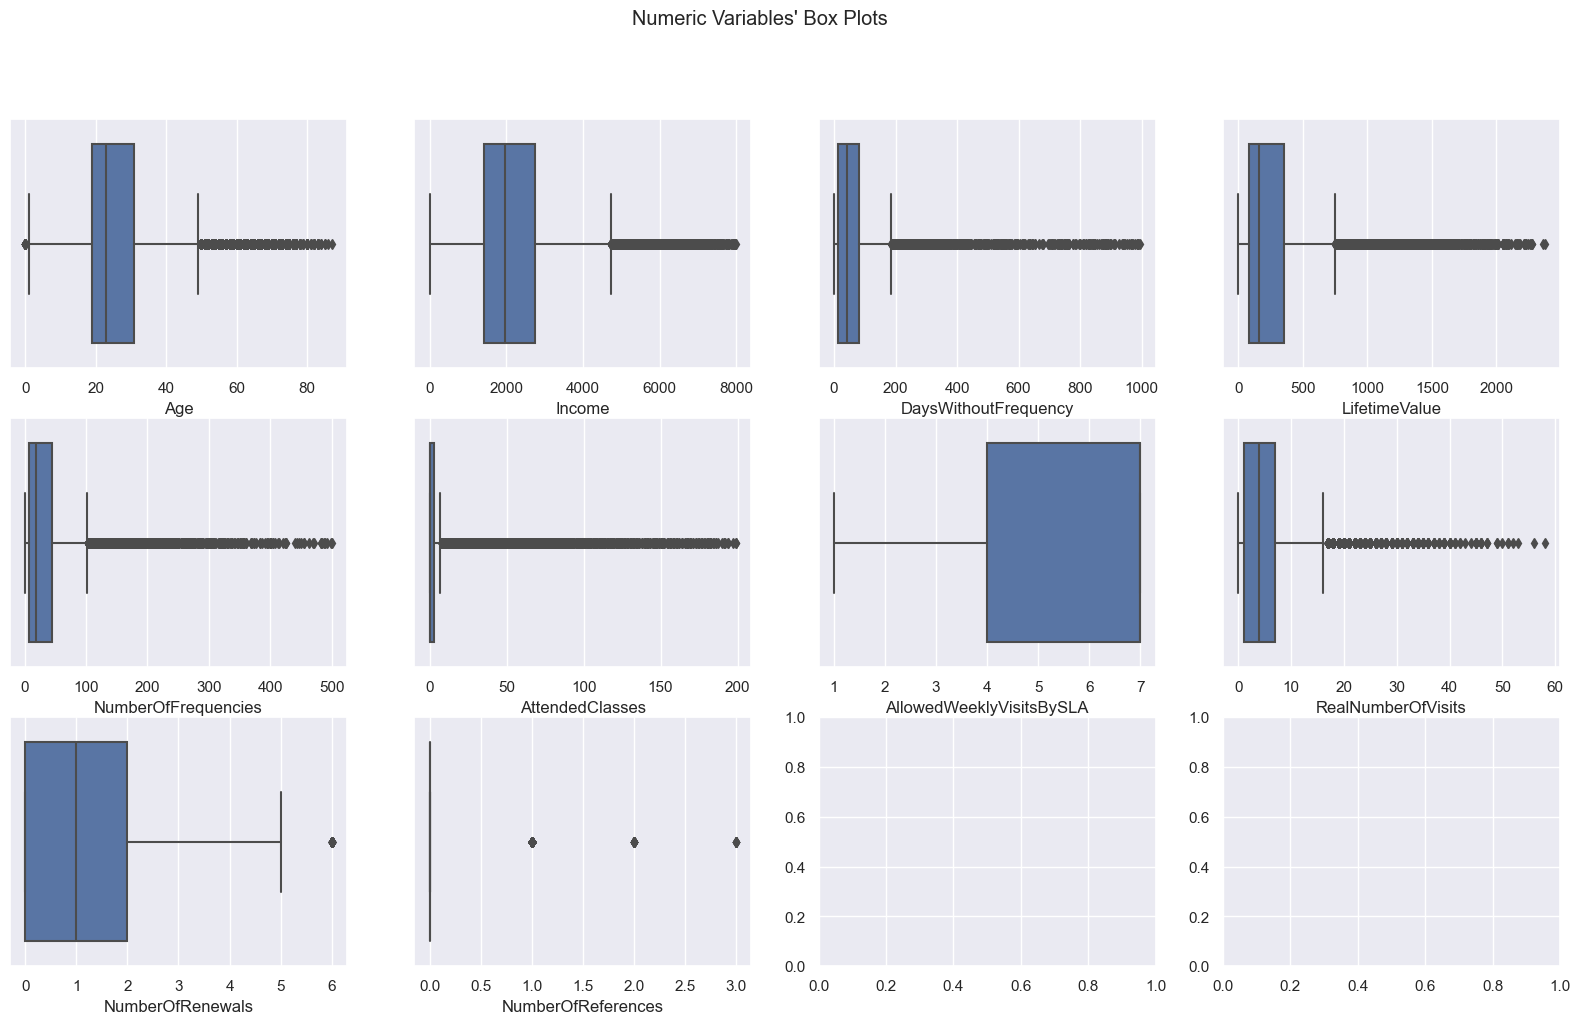

In [43]:
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_1_copy[feat], ax=ax)
    
plt.suptitle("Numeric Variables' Box Plots")
plt.show()

__Outlier removal using only the IQR method__

In [44]:
# Calculate quartiles and IQR
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

# Define lower and upper bounds
upper_lim = q75 + 1.5 * iqr   # 1.5 is a value we can change
lower_lim = q25 - 1.5 * iqr

# Remove outliers
filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]

print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.5568


__Combining different outlier methods__

In [45]:
# More robust/consistent outlier detection method:
df_3 = df[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / df_original.shape[0], 4))
# this way only if i have an observation consider outlier in both of the approaches than i will call it an outlier

Percentage of data kept after removing outliers: 0.9842


In [46]:
# Get the manual filtering version
df_features = df_1.copy()

## Feature Engineering

## Variable selection: Redundancy VS Relevancy

**Redundancy:** Handling highly correlated variables

**Relevancy:** Selecting variables based on the relevancy of each one to the task.

Example: remove uncorrelated variables with the target, stepwise regression, use variables for product clustering, use variables for socio-demographic clustering, ...   
Variables that aren't correlated with any other variable are often also not relevant. In this case we will not focus on this a lot since we don't have a defined task yet.

In [ ]:
df_features.drop(['LastPeriodStart','LastPeriodFinish'],axis=1,inplace=True)

In [ ]:
# The DaysWithoutFrequency are the days between the DateLastVisit and the EnrollmentFinish
df_features[df_features['DateLastVisit'] + pd.to_timedelta(df_features['DaysWithoutFrequency'], unit='D') == df_features['EnrollmentFinish']]

In [ ]:
df_features['UseByTime'].value_counts(normalize=True)

In [ ]:
df_features[df_features['EnrollmentStart']==df_features['EnrollmentFinish']].loc[:,'EnrollmentStart':'UseByTime']

In [ ]:
df_features[df_features['LifetimeValue'] == df_features['LifetimeValue'].max()]

In [ ]:
# Calcular a diferença de tempo e criar uma nova coluna no DataFrame
df_features['EnrollmentPeriod'] = df_features.apply(lambda row: (row['EnrollmentFinish'] - row['EnrollmentStart']).days, axis=1)

# Exibir o DataFrame resultante
df_features.drop(['ID','EnrollmentStart','EnrollmentFinish'], axis=1, inplace=True)

In [ ]:
df_features.drop('DateLastVisit',axis=1,inplace=True)

In [ ]:
df_features.dtypes

In [ ]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
                   'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
                   'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences','EnrollmentPeriod']
bin_features = ['Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
                'FitnessActivities', 'TeamActivities', 'RacketActivities',
                'CombatActivities', 'SpecialActivities', 'OtherActivities',
                'HasReferences', 'Dropout']

## Scaling

__Use MinMaxScaler to scale the data:__

In [ ]:
df_minmax = df_features.copy()

In [ ]:
scaler = MinMaxScaler()
df_minmax[metric_features] = scaler.fit_transform(df_minmax[metric_features])
df_minmax.head()

In [ ]:
# Checking max and min of minmaxed variables
df_minmax[metric_features].describe().round(2).T

__Use StandardScaler to scale the data:__

In [ ]:
df_standard = df_features.copy()

In [ ]:
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance.
df_standard[metric_features] = scaler.fit_transform(df_standard[metric_features])
df_standard.head()

In [ ]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2).T

In [ ]:
df_mm_cluster = df_minmax.copy()

# Clustering

## Hierarchical Clustering

In [ ]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df_mm_cluster[metric_features])
hc_labels

In [ ]:
Counter(hc_labels)

In [ ]:
# Characterizing the clusters
df_concat = pd.concat((df_mm_cluster, pd.Series(hc_labels, name='labels', index=df_mm_cluster.index)), axis=1)
df_concat.groupby('labels').mean()

### Defining the linkage method to choose:

In [ ]:
# Computing SST
X = df_mm_cluster[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """
    This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
                
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  

        # append the R2 of the given cluster solution
        r2.append(ssb/sst) 
        
    return np.array(r2)

In [ ]:
get_r2_hc(df_mm_cluster[metric_features], 'ward', max_nclus=3, min_nclus=1, dist='euclidean')

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]

# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [get_r2_hc(df=df_mm_cluster[metric_features], link_method=link, max_nclus=max_nclus) 
     for link in hc_methods] ).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

### Defining the number of clusters:

Where is the **first big jump** on the Dendrogram?

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

# define the clusterer
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_mm_cluster[metric_features])

In [ ]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test cluster solutions

In [ ]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(df_mm_cluster[metric_features])

In [ ]:
# Characterizing the 4 clusters
df_concat = pd.concat((df_mm_cluster, pd.Series(hc4_labels, name='labels', index=df_mm_cluster.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# 5 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc5lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=5)
hc5_labels = hc5lust.fit_predict(df_mm_cluster[metric_features])

In [ ]:
# Characterizing the 5 clusters
df_concat = pd.concat((df_mm_cluster, pd.Series(hc5_labels, name='labels', index=df_mm_cluster.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc6lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=6)
hc6_labels = hc6lust.fit_predict(df_mm_cluster[metric_features])

In [ ]:
# Characterizing the 5 clusters
df_concat = pd.concat((df_mm_cluster, pd.Series(hc6_labels, name='labels', index=df_mm_cluster.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# Let's put both HC4 and HC5 labels in the same df to compare
df_hc4_hc5 = pd.concat((df_mm_cluster,
                        pd.Series(hc4_labels, name='hc4_labels', index=df_mm_cluster.index),
                        pd.Series(hc5_labels, name='hc5_labels', index=df_mm_cluster.index)
                        ), axis=1)

In [ ]:
# See crosstab of 4 vs 5
pd.crosstab(df_hc4_hc5['hc5_labels'],
           df_hc4_hc5['hc4_labels'])

### Final Hierarchical clustering solution

In [ ]:
# final cluster solution
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=5)
hc_labels = hclust.fit_predict(df_mm_cluster[metric_features])

In [ ]:
# Characterizing the final clusters
df_concat = pd.concat((df_mm_cluster, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
cluster_means = df_concat.groupby('labels').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)